In [2]:
!pip install matplotlib
!pip install tensorflow


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


/Users/vedant.pandey/Library/Caches/JetBrains/PyCharmCE2024.2/demo/PyCharmLearningProject/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.83      0.91      0.87       214
         1.0       0.88      0.79      0.83       186

    accuracy                           0.85       400
   macro avg       0.86      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400



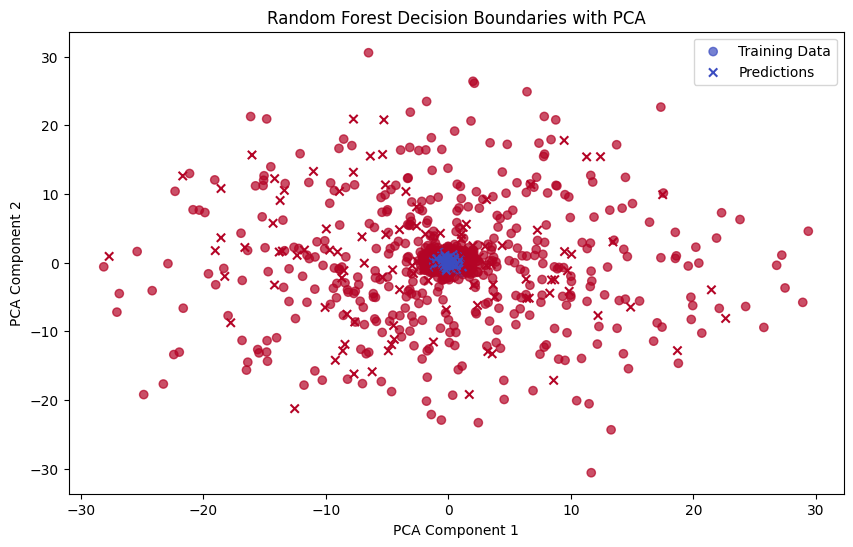

Epoch 1/10


/Users/vedant.pandey/Library/Caches/JetBrains/PyCharmCE2024.2/demo/PyCharmLearningProject/venv/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 984us/step - accuracy: 0.5297 - loss: 0.6459 
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - accuracy: 0.7611 - loss: 0.5219
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 874us/step - accuracy: 0.8726 - loss: 0.4811
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step - accuracy: 0.8454 - loss: 0.4321
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - accuracy: 0.8335 - loss: 0.3740
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - accuracy: 0.8381 - loss: 0.3577
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step - accuracy: 0.8381 - loss: 0.3506
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - accuracy: 0.8393 - loss: 0.3434
Epoch 9/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step - accuracy: 0.8363 - loss: 0.3586
Epoch 10/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - accuracy: 0.8360 - loss: 0.3422


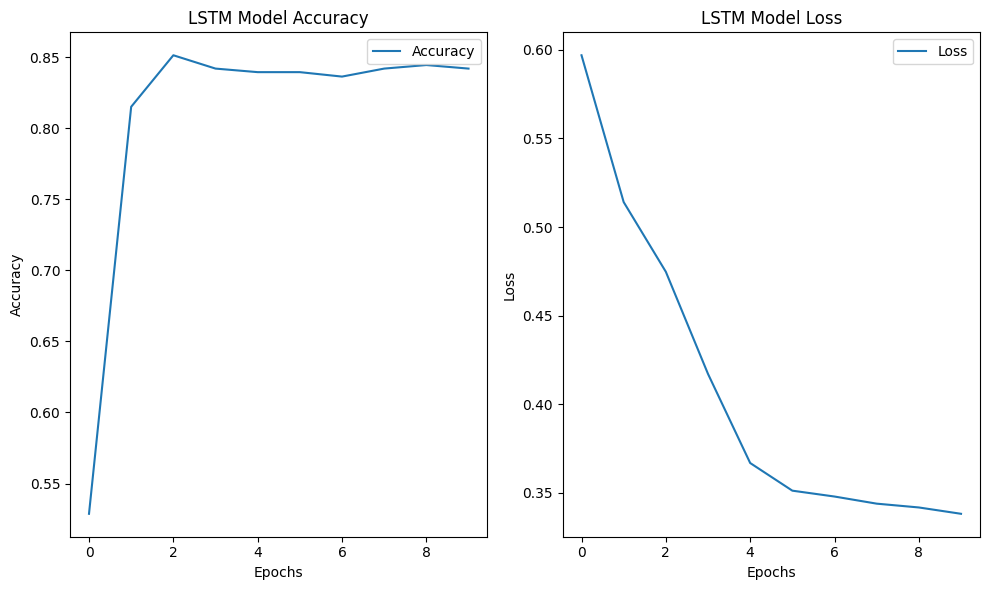

Accuracy: 0.8575


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load and preprocess data
def preprocess_data(data):
    # Example: Normalize and segment data
    return data

data = pd.read_csv('fall_detection_dataset.csv')  # Load your dataset
X = preprocess_data(data[['gyro_x', 'gyro_y', 'gyro_z']])
y = data['label']  # Labels: 'fall' or 'no fall'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Example with a Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
predictions = rf_model.predict(X_test)
print(classification_report(y_test, predictions))

# Plot decision boundaries (Random Forest) using PCA for dimensionality reduction
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='coolwarm', alpha=0.7, label='Training Data')
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=predictions, cmap='coolwarm', marker='x', label='Predictions')
plt.title('Random Forest Decision Boundaries with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

# Example with an LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Reshape data for LSTM (LSTM expects 3D input: [samples, timesteps, features])
X_train_lstm = np.expand_dims(X_train, axis=2)
X_test_lstm = np.expand_dims(X_test, axis=2)

history = model.fit(X_train_lstm, y_train, epochs=10, verbose=1)

# Plot accuracy and loss during training
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.title('LSTM Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss')
plt.title('LSTM Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate LSTM model
loss, accuracy = model.evaluate(X_test_lstm, y_test, verbose=0)
print(f'Accuracy: {accuracy:.4f}')
